<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Actualizado_Preentrega_Proyecto_Final-Melina_Randazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de comportamiento de compradores de viaje online**
*¿Cómo compran sus viajes los viajeros?*


# **Contexto**
En el entorno digital actual, los viajeros dedican una cantidad significativa de tiempo en línea investigando sobre sus destinos, buscando recomendaciones y comparando opciones. La dinámica económica contemporánea ha impulsado a un mayor número de personas a invertir sus ahorros en experiencias de viaje, incrementando la demanda de servicios turísticos.

# **Audiencia**
Este informe está diseñado para proporcionar información valiosa a profesionales de marketing y del sector turístico, con el objetivo de optimizar sus estrategias y alinear sus ofertas de viajes para maximizar las ventas y satisfacer las crecientes expectativas de los consumidores.
Este enfoque refuerza la importancia del contexto digital y económico, y deja claro que el informe busca ser una herramienta para los profesionales del sector.

# ***Preguntas Generales***
- ¿Cuál es la distribución de compra de viajes según el estado laboral de las personas?
- ¿Cómo varía la compra de viajes según el dispositivo preferido para acceder a la página web?
- ¿Existe una relación entre el número de conexiones sociales que han viajado y la decisión de compra de un viaje?
- ¿El seguimiento de la página web influye en la probabilidad de compra de un viaje?
- ¿Qué relación existe entre el tiempo promedio diario que una persona pasa en la página web y su decisión de compra?

# ***Preguntas Específicas***
- ¿Cómo afecta la cantidad de miembros en la familia a la decisión de compra de un viaje?
- ¿Qué papel juega la edad en la decisión de compra de viajes?


In [1]:
# Instalar la librería kaggle
!pip install kaggle

# Crear la carpeta .config/kaggle si no existe
!mkdir -p /root/.config/kaggle/

# Descargar el archivo kaggle.json desde GitHub
!wget --no-check-certificate 'https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json' -O /root/.config/kaggle/kaggle.json

# Configurar los permisos para el archivo kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

# Ver el nombre de los archivos del dataset
import kaggle
!kaggle datasets files ddosad/customer-behaviour-tourism-portal


--2024-09-17 22:49:20--  https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘/root/.config/kaggle/kaggle.json’

/root/.config/kaggl 100%[===================>]      63  --.-KB/s    in 0s      

2024-09-17 22:49:20 (4.07 MB/s) - ‘/root/.config/kaggle/kaggle.json’ saved [63/63]

name                             size  creationDate         
------------------------------  -----  -------------------  
Customer behaviour Tourism.csv  820KB  2023-11-13 15:17:10  


In [2]:
#Instalar libreria missingo
!pip install missingno

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import missingno as msno
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import zipfile
import os

In [36]:
# Descargar el dataset desde Kaggle
!kaggle datasets download -d ddosad/customer-behaviour-tourism-portal

# Descomprimir el archivo descargado
dataset_zip = "customer-behaviour-tourism-portal.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(".")

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv("Customer behaviour Tourism.csv")
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal
License(s): other
customer-behaviour-tourism-portal.zip: Skipping, found more recently modified local copy (use --force to force download)
    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3   

Dataset reference: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal

# Columnas:
**UserID**:	Unique ID of the user

**Taken_product**: Whether the customer buy the ticket or not

**Yearly_avg_view_on_travel_page**:	Average yearly views on any travel-related page by the user

**preferred_device**:	Preferred device for user login

**total_likes_on_outstation_checkin_given**:	Total number of likes given by the user on out-of-station check-ins in the last year

**yearly_avg_Outstation_checkins**:	Average number of out-of-station check-ins done by the user

**member_in_family**:	Total number of relationships mentioned by the user in the account

**preferred_location_type**:	Preferred type of location for traveling by the user

**Yearly_avg_comment_on_travel_page**:	Average yearly comments on any travel-related page by the user

**total_likes_on_outofstation_checkin_received**:	Total number of likes received by the user on out-of-station check-ins in the last year

**week_since_last_outstation_checkin**:	Number of weeks since the last out-of-station check-in update by the user

**following_company_page**:	Whether the customer is following the company page (Yes or No)

**montly_avg_comment_on_company_page**:	Average monthly comments on the company page by the user

**working_flag**:	Whether the customer is working or not

**travelling_network_rating**:	The rating indicating if the user has close friends who also like traveling. 1 is high, 4 is lowest

**Adult_flag**:	Whether the customer is an adult or not

**Daily_Avg_mins_spend_on_traveling_page**:	Average time spent on the company's travel page by the user

In [71]:
# Ver la lista de columnas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   UserID                                        11760 non-null  int64   
 1   Taken_product                                 11760 non-null  int64   
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64 
 3   preferred_device                              11760 non-null  category
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64 
 5   yearly_avg_Outstation_checkins                11760 non-null  float64 
 6   member_in_family                              11760 non-null  int64   
 7   preferred_location_type                       11760 non-null  category
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64 
 9   total_likes_on_outofstation_checkin_received  1176

In [6]:
df.describe().round(1)

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11760.0,11179.0,11379.0,11554.0,11760.0,11760.0,11760.0,11760.0,11759.0,11759.0
mean,1005880.5,280.8,28170.5,74.8,6531.7,3.2,28.7,2.7,0.8,13.8
std,3395.0,68.2,14385.0,24.0,4706.6,2.6,48.7,1.1,0.9,9.1
min,1000001.0,35.0,3570.0,3.0,1009.0,0.0,4.0,1.0,0.0,0.0
25%,1002940.8,232.0,16380.0,57.0,2940.8,1.0,17.0,2.0,0.0,8.0
50%,1005880.5,271.0,28076.0,75.0,4948.0,3.0,22.0,3.0,1.0,12.0
75%,1008820.2,324.0,40525.0,92.0,8393.2,5.0,27.0,4.0,1.0,18.0
max,1011760.0,464.0,252430.0,815.0,20065.0,11.0,500.0,10.0,3.0,270.0


In [37]:
# Valores únicos para la columna yearly_avg_Outstation_checkins
print(df['yearly_avg_Outstation_checkins'].unique())

['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']


In [38]:
#Reemplazar * en la columna yearly_avg_Outstation_checkins por 0
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', 0)
# Convertir la columna 'yearly_avg_Outstation_checkins' a tipo float64
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype('float64')

In [39]:
#Setear columnas categoricas con tipo de dato category
df["Taken_product"]= df["Taken_product"].astype("category")
df["preferred_device"]= df["preferred_device"].astype("category")
df["member_in_family"]=df["member_in_family"].astype("category")
df["preferred_location_type"]=df["preferred_location_type"].astype("category")
df["following_company_page"]=df["following_company_page"].astype("category")
df["working_flag"]=df["working_flag"].astype("category")
df.describe(include="category")

,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11760,11729,11657,11760
unique,2,10,7,15,5,3
top,No,Tab,3,Beach,No,No
freq,9864,4172,4561,2424,8355,9951


In [40]:
# Valores únicos para la columna 'Adult_flag'
print(df['Adult_flag'].unique())

# Valores únicos para la columna 'member_in_family'
print(df['member_in_family'].unique())


[ 0.  1.  3.  2. nan]
['2', '1', '4', 'Three', '3', '5', '10']
Categories (7, object): ['1', '10', '2', '3', '4', '5', 'Three']


In [41]:
# Basado en la información adquirida en Keaggle
# Reemplazar valores distintos a 0 de la columna Adult_flag por 1
df['Adult_flag'] = df['Adult_flag'].replace([2,3,4,5], 1)
df['Adult_flag'] = df['Adult_flag'].fillna(0)
df['Adult_flag'] = df['Adult_flag'].astype('int64')

In [42]:
# Reemplazar 'Three' por 3 en la columna 'member_in_family'
df['member_in_family'] = df['member_in_family'].replace('Three', 3)

# Convertir la columna 'member_in_family' a int64
df['member_in_family'] = df['member_in_family'].astype('int64')


In [43]:
#Ver valores distintos para las columnas following_company_page,	working_flag
print("Valores distintos para following_company_page:", df['following_company_page'].unique())
print("Valores distintos para working_flag:", df['working_flag'].unique())


Valores distintos para following_company_page: ['Yes', 'No', 'Yeso', NaN, '1', '0']
Categories (5, object): ['0', '1', 'No', 'Yes', 'Yeso']
Valores distintos para working_flag: ['No', 'Yes', '0']
Categories (3, object): ['0', 'No', 'Yes']


In [44]:
df["following_company_page"]=df["following_company_page"].astype("object")
# Reemplazar valores en la columna 'following_company_page'
df['following_company_page'] = df['following_company_page'].replace(['Yeso', '1'], 'Yes')
df['following_company_page'] = df['following_company_page'].fillna('No')
df['following_company_page'] = df['following_company_page'].replace('0', 'No')

# Verificar los valores únicos después de la limpieza
print("Valores distintos para following_company_page después de la limpieza:", df['following_company_page'].unique())


Valores distintos para following_company_page después de la limpieza: ['Yes' 'No']


In [45]:
# Reemplazar el valor '0' en la columna working_flag por No
df['working_flag'] = df['working_flag'].replace('0', 'No')


In [46]:
#Reemplazar "No" con 0 y "Yes" con 1 en las columnas especificadas
df['Taken_product'] = df['Taken_product'].replace({'No': 0, 'Yes': 1})
df['following_company_page'] = df['following_company_page'].replace({'No': 0, 'Yes': 1})
df['working_flag'] = df['working_flag'].replace({'No': 0, 'Yes': 1})


In [47]:
#Cambiar el tipo de datos de las columnas a 'int64'
df['Taken_product'] = df['Taken_product'].astype('int64')
df['following_company_page'] = df['following_company_page'].astype('int64')
df['working_flag'] = df['working_flag'].astype('int64')


In [48]:
# Verificar los valores únicos en la columna 'preferred_device'
print(df['preferred_device'].unique())

['iOS and Android', 'iOS', 'ANDROID', NaN, 'Android', ..., 'Other', 'Others', 'Tab', 'Laptop', 'Mobile']
Length: 11
Categories (10, object): ['ANDROID', 'Android', 'Android OS', 'Laptop', ..., 'Others', 'Tab', 'iOS',
                          'iOS and Android']


In [49]:
# Reemplazar 'Others' por 'Other' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('Others', 'Other')

# Reemplazar 'ANDROID' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('ANDROID', 'Android')

# Reemplazar 'Android OS' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('Android OS', 'Android')

# Reemplazar 'iOS and Android' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('iOS and Android', 'Mobile')

In [50]:
# Obtener los valores únicos de la columna 'preferred_location_type'
unique_values = df['preferred_location_type'].unique()

# Convertir los valores únicos a una lista y mostrarlos
unique_values_list = list(unique_values)
print(unique_values_list)

['Financial', 'Other', 'Medical', nan, 'Game', 'Social media', 'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel', 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']


In [51]:
# Reemplazar 'Tour  Travel' por 'Tour and Travel' en la columna 'preferred_location_type'
df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

In [52]:
# Contar valores de la columna preferred_location_type con valos nan

df['preferred_location_type'].isna().sum()


31

In [53]:
# Reemplazar valores nan por Other en la columna preferred_location_type dado que no representa impacto para el volumen de datos

df['preferred_location_type'] = df['preferred_location_type'].fillna('Other')


<Axes: >

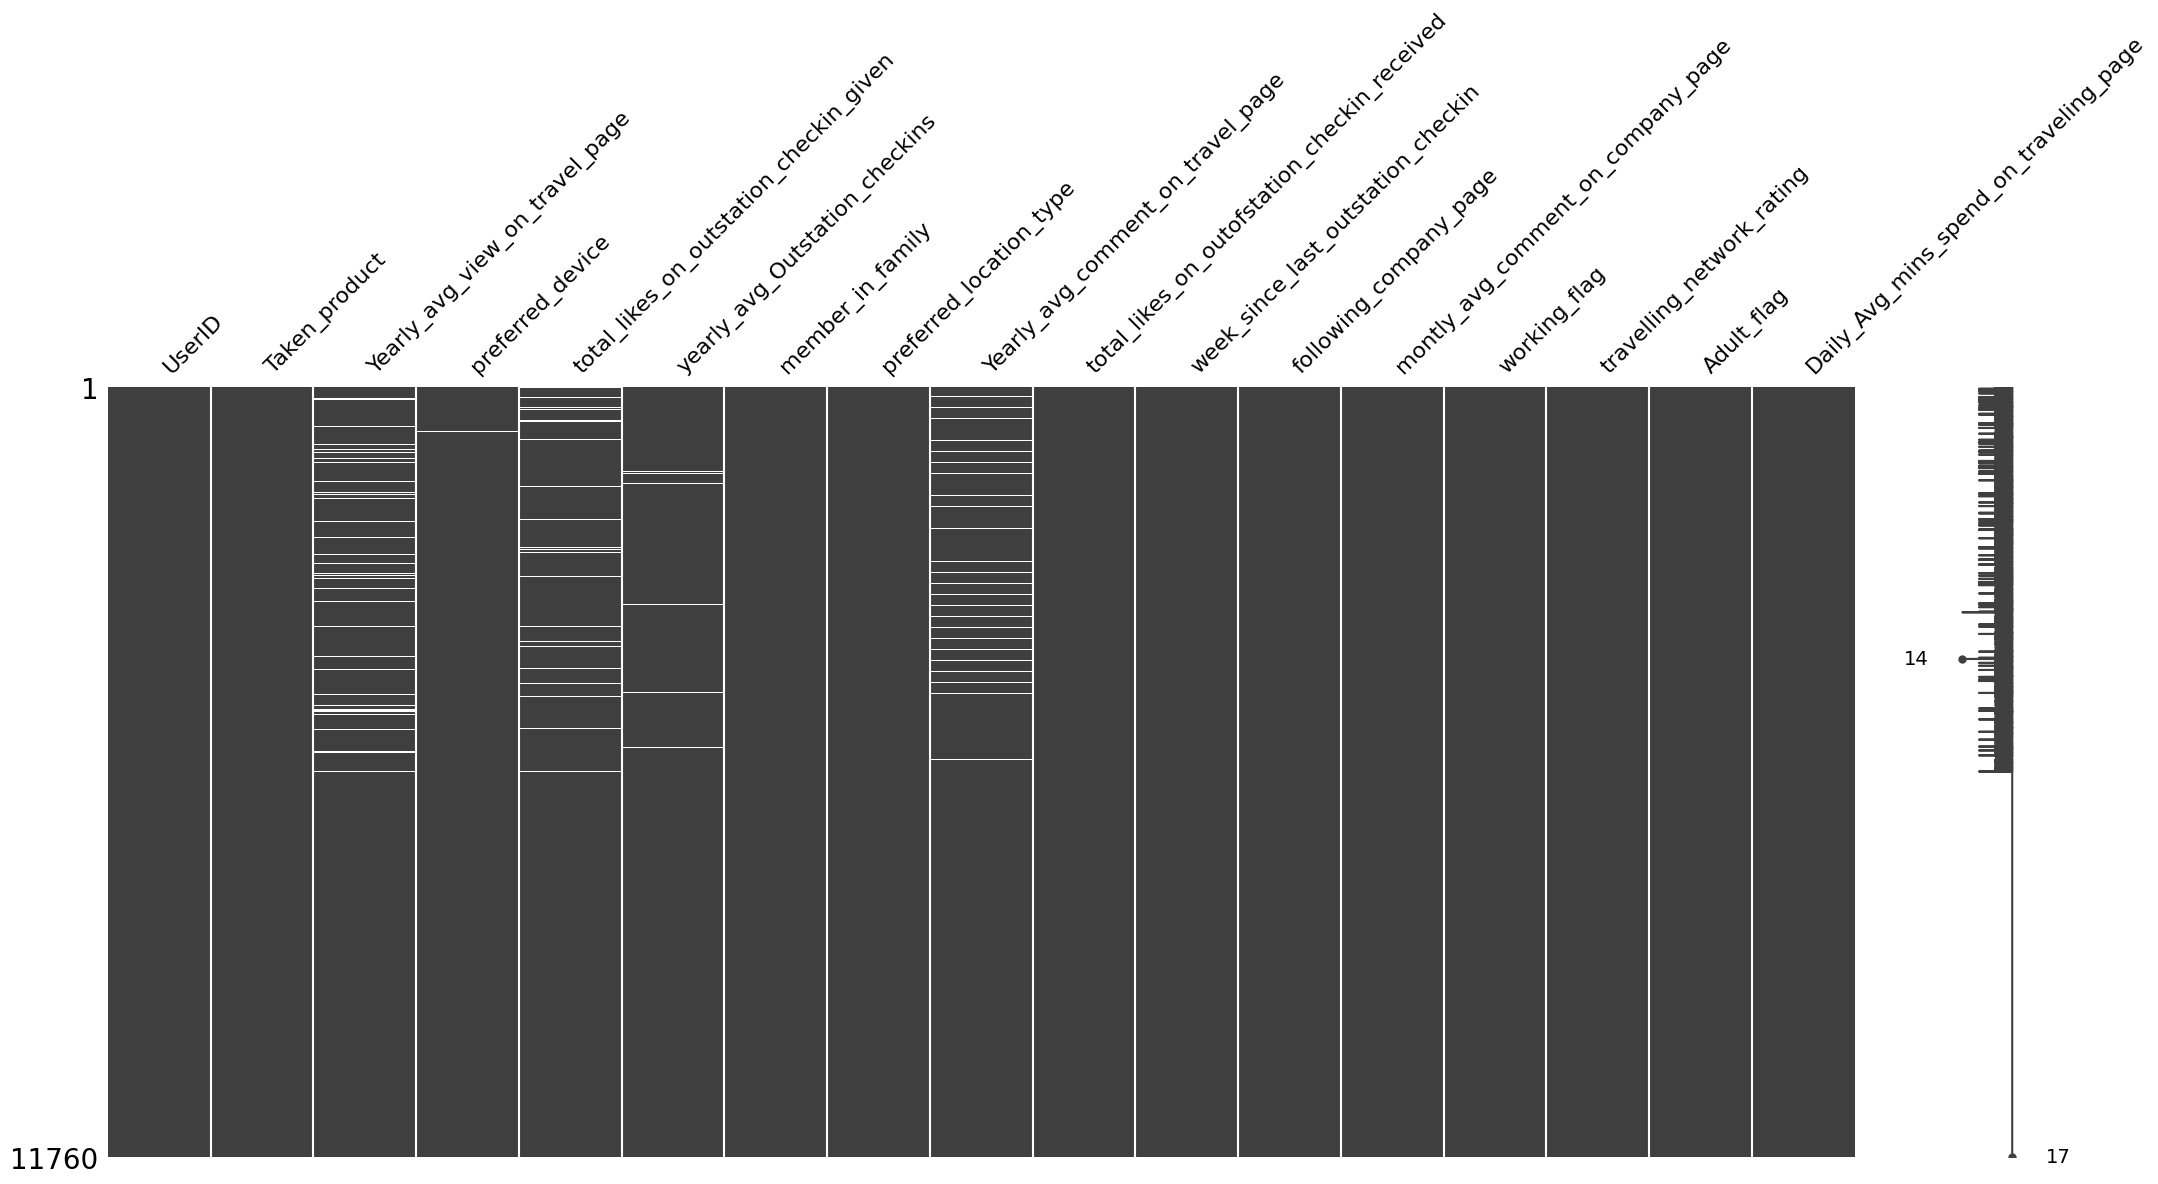

In [54]:
#Evaluar si hay valores nulos
msno.matrix(df)

Se detecta solo un valor nulo para la columna "preferred_device" por lo que se decide completarla con el valor moda "Tab".

Los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" dado que son valores de cantidad de interacciones del usuario con los sitios se decide reemplazar los nulos por 0.



In [55]:
#Reemplazar los nulos de la columna preferred_device por Tab dado que no representa impacto para el volumen de datos
df['preferred_device'] = df['preferred_device'].fillna('Tab')

In [56]:
#Reemplazar los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" por 0 considerando el valor nulo como falta de interaccion
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].fillna(0)
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna(0)
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].fillna(0)


In [57]:
df['Taken_product'].value_counts(normalize=True)*100

,proportion
Taken_product,
0,83.877551
1,16.122449


Se observa que de la muestra estudiada, el 83% de los usuarios de los sitios de turismo no realizan la compra del viaje.
La muestra esta desbalaceada para realizar un análisis de clasificación asertivo.

# **Análisis exploratorio de datos**

Luego de la limpieza y estandarización de los datos, se procede a realizar el análisis exploratorio para una evalucaión del comportamiento de los datos de la muestra.

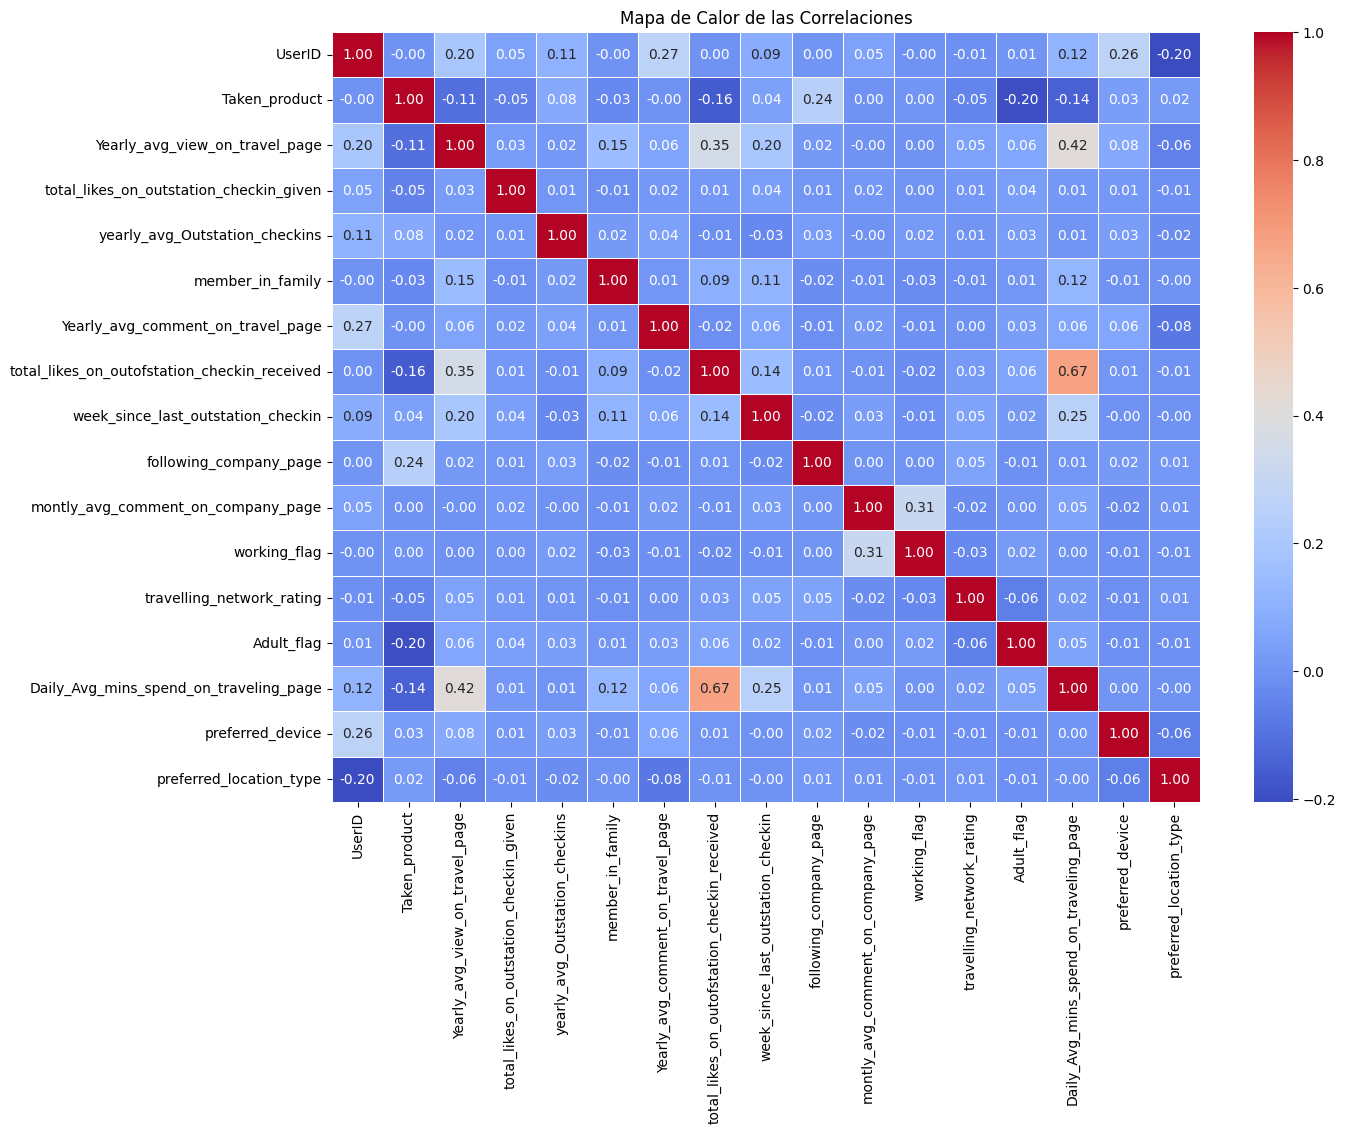

In [79]:
# Definir las columnas a codificar
features = ['preferred_device', 'preferred_location_type']

ordinal_encoder = OrdinalEncoder()
encoded_features = ordinal_encoder.fit_transform(df[features])
encoded_features_df = pd.DataFrame(encoded_features, columns=ordinal_encoder.get_feature_names_out(features))

# Seleccionar las columnas numéricas originales
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_features]

# Concatenar el DataFrame codificado con las columnas numéricas originales
df_encoded = pd.concat([df_numeric, encoded_features_df], axis=1)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

A partir del mapa de calor se observa una correlacion lineal positiva ente las personas que siguen el sitio web y efectivamente comprar el producto.
Tambien existe una correlacion entre la cantidad de miembros en la familia y el tiempo visitando sitios de viaje. Asi como tambien el tiempo visitando el sitio web muestra una correlación con la compra del producto.
Existe una correlacion entre los dispositivos utilizados y la locación preferida, pero esta correlación no resulta significativa para el analisis.

Ninguna de las variables presenta una correlación fuerte entre si, pero se puede ver el tiempo visitando los sitios, seguir el sitio web, la cantidad de miembros en la familia y la edad representan variables utiles para el analisis sobre turismo de este dataset.

In [66]:
# Crear el gráfico de pastel
fig = px.pie(df,
             names='preferred_device',
             title='Distribución de Dispositivos Preferidos',
             hole=0.3,  # Crear el círculo blanco en el centro
             color_discrete_map={'Mobile': 'lightblue', 'Desktop': 'steelblue'})  # Ajusta los colores según sea necesario

# Mostrar el porcentaje en cada porción
fig.update_traces(textinfo='label+percent',
                  textfont_size=14)

# Ajustar el diseño del gráfico
fig.update_layout(
    annotations=[dict(text='',
                      font_size=20,
                      showarrow=False,
                      x=0.5,
                      y=0.5)]
)

# Mostrar el gráfico
fig.show()


Los dispositivos preferidos para realizar busqueda de viajes son tablets y celuares tanto android como iphone.

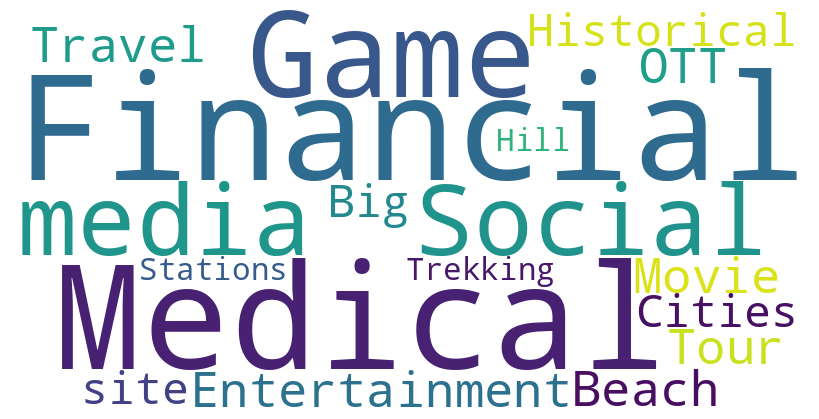

In [80]:
# Crear nube de palabras para ver las ubicaciones preferidas de viajes usando los valores de la columna preferred_location_type

from wordcloud import WordCloud

# Obtener los valores únicos de la columna 'preferred_location_type'
unique_locations = df['preferred_location_type'].unique()

# Crear una cadena de texto con los valores únicos
text = " ".join(str(location) for location in unique_locations)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Los motivos de viaje más frecuentes son financieros, médicos y por juego/esparcimiento.

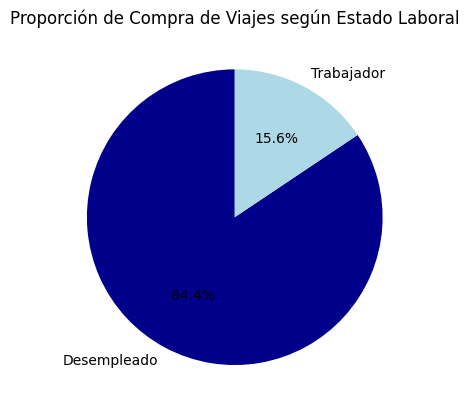

In [ ]:
# Crear una copia de los valores de 'working_flag' solo para el gráfico
working_purchase = df[df['Taken_product'] == 1]['working_flag'].replace({0: 'Desempleado', 1: 'Trabajador'}).value_counts()

# Graficar la proporción de compra de viajes según el estado laboral con colores personalizados
working_purchase.plot.pie(autopct='%1.1f%%', startangle=90, colors=['darkblue', 'lightblue'])

plt.title('Proporción de Compra de Viajes según Estado Laboral')
plt.ylabel('')  # Eliminar la etiqueta del eje Y para el gráfico de torta
plt.show()



El gráfico de torta indica que los clientes que no cuentan con empleo formal tienen una mayor tendencia a adquirir viajes en comparación con aquellos que se encuentran en situación de empleo activo.

In [70]:
# Agrupar los datos y calcular las proporciones
prop = df.groupby('preferred_device', observed=False)['Taken_product'].value_counts(normalize=True).unstack()
prop.columns = ['No', 'Sí']

# Convertir el DataFrame a un formato adecuado para Plotly
prop_reset = prop.reset_index().melt(id_vars='preferred_device', value_vars=['No', 'Sí'],
                                     var_name='Decisión de Compra', value_name='Proporción')

# Crear el gráfico de barras apiladas
fig = px.bar(prop_reset,
             x='preferred_device',
             y='Proporción',
             color='Decisión de Compra',
             text='Proporción',
             color_discrete_map={'No': 'lightblue', 'Sí': 'steelblue'},  # Colores discretos en tonos de azul
             labels={'preferred_device': 'Dispositivo Preferido', 'Proporción': 'Proporción', 'Decisión de Compra': 'Decisión de Compra'},
             title='Proporción de Compra de Viajes según Dispositivo Preferido',
             barmode='stack')

# Personalizar el texto sobre las barras
fig.update_traces(texttemplate='%{text:.2%}',
                  textfont=dict(size=12, color='black'))

fig.update_traces(texttemplate='<b>%{text:.2%}</b>',  # Texto en negrita
                  textfont=dict(size=12, color='black'))

fig.update_layout(
    legend_title_text='Decisión de Compra',
    legend=dict(
        title='Decisión de Compra',
        itemsizing='constant',
        x=1.15,
        y=1
    ),
)

fig.show()


El gráfico de proporciones muestra que los mayores porcentajes de compras de viajes se registran a través de computadoras, dispositivos iOS, y en la categoría de "Otros", que abarca medios no digitales.

In [ ]:
# Agrupar los datos según travelling_network_rating y taken_product
df_grouped = df.groupby(['travelling_network_rating', 'Taken_product']).size().unstack(fill_value=0)

# Cambiar los nombres de las columnas para que en lugar de 0 y 1 diga 'No' y 'Sí'
df_grouped.columns = ['No', 'Sí']

# Convertir los datos a formato long para Plotly
df_grouped_long = df_grouped.reset_index().melt(id_vars='travelling_network_rating',
                                                value_vars=['No', 'Sí'],
                                                var_name='Compraron un viaje',
                                                value_name='Cantidad')

# Calcular el total por 'travelling_network_rating'
df_grouped_long['Total'] = df_grouped_long.groupby('travelling_network_rating')['Cantidad'].transform('sum')

# Calcular los porcentajes para cada barra
df_grouped_long['Porcentaje'] = (df_grouped_long['Cantidad'] / df_grouped_long['Total'] * 100).round(2)

# Crear el gráfico de barras apiladas
fig = px.bar(df_grouped_long,
             x='travelling_network_rating',
             y='Cantidad',
             color='Compraron un viaje',
             color_discrete_map={'No': 'lightblue', 'Sí': 'steelblue'},
             text='Porcentaje',
             title='Relación entre la red de contactos viajeros y la compra de un viaje',
             labels={'travelling_network_rating': 'Rating de la red de contactos viajeros',
                     'Cantidad': 'Cantidad de contactos'},
             barmode='stack')

# Actualizar el texto en el gráfico con los porcentajes
fig.update_traces(texttemplate='<b>%{text:.2f}%</b>',
                  textfont=dict(size=12, color='black'))

# Ajustar el diseño
fig.update_layout(
    legend_title_text='Compraron un viaje',
    xaxis_title='Rating de la red de contactos viajeros',
    yaxis_title='Cantidad de contactos',
    xaxis=dict(tickangle=0),
    title_x=0.5,
    title_y=0.95
)

# Mostrar el gráfico
fig.show()


El gráfico de densidad revela que las conexiones sociales relacionadas con los viajeros presentan una cierta relación con la decisión de compra de viajes. Sin embargo, esta relación no parece ser un factor determinante en la decisión de compra.

In [ ]:
# Cambiar los valores de following_company_page a "Sí" y "No"
df['following_company_page'] = df['following_company_page'].replace({1: 'Sí', 0: 'No'})

# Crear el gráfico con facetas y apilar los histogramas
fig = px.histogram(df,
                   x='Taken_product',
                   facet_col='following_company_page',
                   color='Taken_product',
                   category_orders={'Taken_product': [0, 1]},
                   color_discrete_map={0: 'lightblue', 1: 'steelblue'},
                   labels={'Taken_product': 'Decisión de Compra'},
                   title='Distribución de Compra de Viajes según Seguimiento de la Página Web',
                   facet_col_wrap=2,
                   barmode='stack')

# Actualizar las etiquetas del eje x
fig.for_each_xaxis(lambda xaxis: xaxis.update(
    tickvals=[0, 1],
    ticktext=['No', 'Sí']
))

# Ajustar los títulos de las facetas
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("following_company_page=", "Seguimiento: ")))

# Mostrar el gráfico
fig.show()


In [ ]:
# Agrupar los datos según following_company_page y Taken_product
df_grouped = df.groupby(['following_company_page', 'Taken_product']).size().unstack(fill_value=0)

# Cambiar los nombres de las columnas para que en lugar de 0 y 1 diga 'No' y 'Sí'
df_grouped.columns = ['No', 'Sí']

df_grouped_long = df_grouped.reset_index().melt(id_vars='following_company_page',
                                                value_vars=['No', 'Sí'],
                                                var_name='Compraron un viaje',
                                                value_name='Cantidad')

df_grouped_long['Total'] = df_grouped_long.groupby('following_company_page')['Cantidad'].transform('sum')

# Calcular los porcentajes para cada barra
df_grouped_long['Porcentaje'] = (df_grouped_long['Cantidad'] / df_grouped_long['Total'] * 100).round(2)

fig = go.Figure()

# Añadir las barras para cada categoría
for label in ['No', 'Sí']:
    df_label = df_grouped_long[df_grouped_long['Compraron un viaje'] == label]
    fig.add_trace(go.Bar(
        x=df_label['following_company_page'],
        y=df_label['Cantidad'],
        name=label,
        text=df_label['Porcentaje'].apply(lambda x: f'<b>{x:.2f}%</b>'),
        textposition='inside',
        marker_color='lightblue' if label == 'No' else 'steelblue'
    ))

fig.update_layout(
    barmode='stack',
    title='Relación entre seguidores del sitio y la compra de un viaje',
    xaxis_title='Seguidor del sitio',
    yaxis_title='Cantidad de seguidores',
    xaxis=dict(tickangle=0),
    legend_title='Compraron un viaje',
    title_x=0.5,
    title_y=0.95,
    showlegend=True
)

fig.show()


Es más probable que concreten la compra los seguidores de la página web respecto a los que no son seguidores, pero tambien se evidencia que la suscripción al sitio web no asegura la compra de viajes. Asimismo, se observa una cantidad significativamente mayor de personas que visitan las páginas web sin suscribirse ni seguir el sitio.

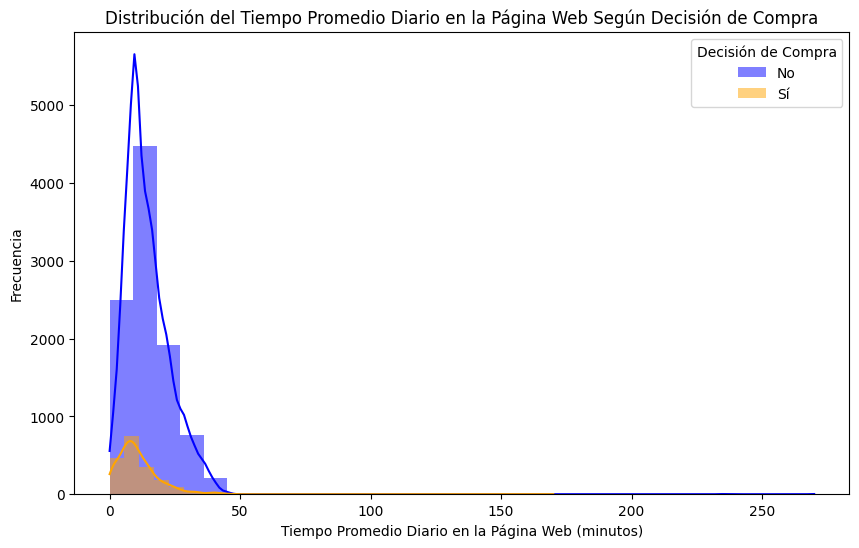

In [ ]:
plt.figure(figsize=(10, 6))

# Crear histogramas superpuestos
sns.histplot(df[df['Taken_product'] == 0]['Daily_Avg_mins_spend_on_traveling_page'], color='blue', label='No', kde=True, bins=30)
sns.histplot(df[df['Taken_product'] == 1]['Daily_Avg_mins_spend_on_traveling_page'], color='orange', label='Sí', kde=True, bins=30)

# Ajustar títulos y etiquetas
plt.title('Distribución del Tiempo Promedio Diario en la Página Web Según Decisión de Compra')
plt.xlabel('Tiempo Promedio Diario en la Página Web (minutos)')
plt.ylabel('Frecuencia')
plt.legend(title='Decisión de Compra')
plt.show()


El histograma revela que los individuos que pasan más tiempo en el sitio web tienden a realizar menos compras, mientras que aquellos que navegan por menos tiempo tienen una mayor propensión a efectuar una compra. Esto sugiere una posible decisión de compra previa entre los usuarios que navegan menos.

In [ ]:
# Crear el histograma
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df['member_in_family'],
    nbinsx=int(df['member_in_family'].max()) + 1,
    marker_color='darkblue',
    opacity=0.75,
    histnorm='',
    showlegend=False
))

fig.update_layout(
    title='Histograma de Miembros en la Familia para Compradores de Viajes',
    xaxis_title='Cantidad de Miembros en la Familia',
    yaxis_title='Frecuencia',
    xaxis=dict(
        tickmode='linear',
        tickvals=list(range(int(df['member_in_family'].max()) + 1))
    ),
    title_x=0.5
)

fig.show()


El histograma muestra que, entre los compradores de viajes, la mayoría proviene de familias con entre 3 y 5 integrantes.

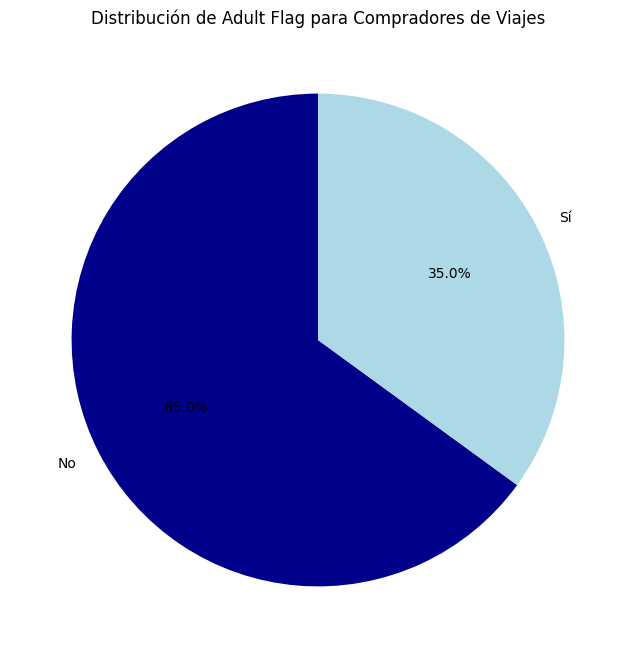

In [ ]:
plt.figure(figsize=(8, 8))

# Datos para gráfico de pastel
prop = df[df['Taken_product'] == 1]['Adult_flag'].value_counts()
prop.plot.pie(autopct='%1.1f%%', colors=['darkblue', 'lightblue'], labels=['No', 'Sí'], startangle=90)

# Ajustar título
plt.title('Distribución de Adult Flag para Compradores de Viajes')
plt.ylabel('')
plt.show()


De los datos obtenidos, se observa que la mayoría de los usuarios menores de edad son los que realizan la mayoría de las compras.

# ***Insights***
- Los dispositivos móviles son los más elegidos para la compra de viajes
- Los jóvenes son quienes más compras realizan
- El tiempo de navegación en el sitio no garantiza la compra
- Las familias representan la mayor cantidad de compradores de viajes

# ***Recomendaciones***
- Crear perfiles de usuarios para marketing asertivo
- Facilitar la búsqueda en función de las preferencias de usuario para que encuentre rápidamente lo que busca
- El sitio web debe tener una interfaz adaptable a los distintos dispositivos

# *Referencias*

Dataset Keaggle: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal

Proyecto Github: https://github.com/melirandazzo/trabajo_ciencia_datos/blob/main/Preentrega_Proyecto_Final-Melina_Randazzo.ipynb

Informe Ejecutivo: https://github.com/melirandazzo/trabajo_ciencia_datos/blob/main/Preentrega_Poryecto_Final_Informe_Ejecutivo_Randazzo.pdf
